# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

#import os
#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


# Read in data

In [1]:
!ls /gws/open/Student/citibike

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [2]:
#Reading data for two months -  October, November
citi_bike_df_oct = pd.read_csv('/gws/open/Student/citibike/201610-citibike-tripdata.zip', compression='zip')
citi_bike_df_nov = pd.read_csv('/gws/open/Student/citibike/201611-citibike-tripdata.zip', compression='zip')

In [3]:
#Combining data of two months
citi_bike_df = citi_bike_df_oct

In [4]:
citi_bike_df = citi_bike_df.append(citi_bike_df_nov, ignore_index=True)

In [49]:
citi_bike_df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,date,houroftheday
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25254,Subscriber,1992.0,1,2016-10-01 00:00:07,0
1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,40.771404,-73.953517,17810,Subscriber,1988.0,2,2016-10-01 00:00:11,0
2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,40.743453,-74.000040,20940,Subscriber,1965.0,1,2016-10-01 00:00:14,0
3,351,2016-10-01 00:00:21,2016-10-01 00:06:12,3307,West End Ave & W 94 St,40.794165,-73.974124,3357,W 106 St & Amsterdam Ave,40.800836,-73.966449,19086,Subscriber,1993.0,1,2016-10-01 00:00:21,0
4,2693,2016-10-01 00:00:21,2016-10-01 00:45:15,3428,8 Ave & W 16 St,40.740983,-74.001702,3323,W 106 St & Central Park West,40.798186,-73.960591,26502,Subscriber,1991.0,1,2016-10-01 00:00:21,0


In [6]:
citi_bike_df.columns

Index([u'Trip Duration', u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year', u'Gender'],
      dtype='object')

In [7]:
citi_bike_df['date'] = pd.to_datetime(citi_bike_df['Start Time'])

citi_bike_df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,date
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25254,Subscriber,1992.0,1,2016-10-01 00:00:07
1,398,2016-10-01 00:00:11,2016-10-01 00:06:49,3147,E 85 St & 3 Ave,40.778012,-73.954071,3140,1 Ave & E 78 St,40.771404,-73.953517,17810,Subscriber,1988.0,2,2016-10-01 00:00:11
2,430,2016-10-01 00:00:14,2016-10-01 00:07:25,345,W 13 St & 6 Ave,40.736494,-73.997044,470,W 20 St & 8 Ave,40.743453,-74.000040,20940,Subscriber,1965.0,1,2016-10-01 00:00:14
3,351,2016-10-01 00:00:21,2016-10-01 00:06:12,3307,West End Ave & W 94 St,40.794165,-73.974124,3357,W 106 St & Amsterdam Ave,40.800836,-73.966449,19086,Subscriber,1993.0,1,2016-10-01 00:00:21
4,2693,2016-10-01 00:00:21,2016-10-01 00:45:15,3428,8 Ave & W 16 St,40.740983,-74.001702,3323,W 106 St & Central Park West,40.798186,-73.960591,26502,Subscriber,1991.0,1,2016-10-01 00:00:21


In [8]:
citi_bike_df.columns

Index([u'Trip Duration', u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year', u'Gender', u'date'],
      dtype='object')

## 1) trip duration of bikers that ride during the day vs night

### Getting the trip duration by the hour of the day
#### This will help in understanding the trip duration for day and night

In [9]:
citi_bike_df['houroftheday'] = pd.to_datetime(citi_bike_df['Start Time']).dt.hour

In [81]:
trip_by_hour = pd.DataFrame(citi_bike_df['houroftheday'],citi_bike_df['Trip Duration'])

In [22]:
trip_by_hour = citi_bike_df.groupby(['houroftheday','Trip Duration']).size()

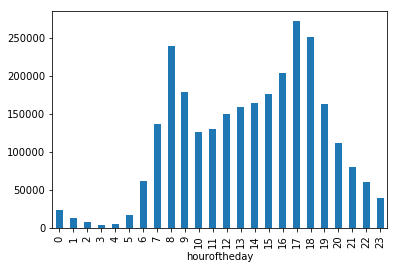

In [50]:
ax1 = citi_bike_df['Trip Duration'].groupby(citi_bike_df['houroftheday']).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)

### Null Hypothesis: H0: Trip Duration of riders is same or more during night as compared to day
### Alternate Hypothesis: H1: Trip Duration during the day is more as compared to night

### $$ \alpha = 0.05 $$

#### Assumptions: 
#### Day Hours --> 7am to 6pm
#### Night Hours -->  before 7am and after 6pm

In [71]:
trip_day_hours_df = citi_bike_df[(citi_bike_df['houroftheday']>=7)& (citi_bike_df['houroftheday']<=18)]

In [72]:
trip_night_hours_df = citi_bike_df[(citi_bike_df['houroftheday']<=6)]

In [73]:
trip_night_hours_df1 = citi_bike_df[(citi_bike_df['houroftheday']>18)]

In [74]:
trip_night_hours_df = trip_night_hours_df.append(trip_night_hours_df1, ignore_index=True)

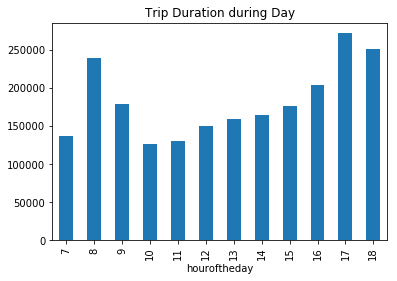

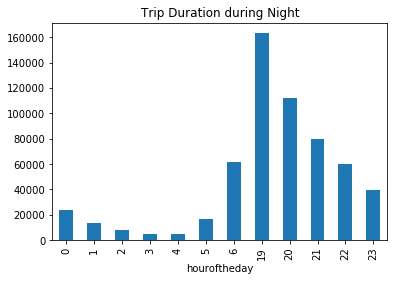

In [121]:
axday = trip_day_hours_df['Trip Duration'].groupby(trip_day_hours_df['houroftheday']).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False, title="Trip Duration during Day")

axnight = trip_night_hours_df['Trip Duration'].groupby(trip_night_hours_df['houroftheday']).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False,title="Trip Duration during Night")

In [79]:
ks = scipy.stats.ks_2samp(trip_day_hours_df['Trip Duration'], trip_night_hours_df['Trip Duration'])
print(ks)

Ks_2sampResult(statistic=0.07288402429109522, pvalue=0.0)


#### Since Pearson's test and Spearman test require same number of samples, and the number of samples in
#### trips_day_hours is more I have selected random values from it and number of these values is equal 
#### to the shorter dataframe

In [90]:

ps = scipy.stats.pearsonr(sorted(np.random.choice(trip_day_hours_df['Trip Duration'], len(trip_night_hours_df))),
                          sorted(trip_night_hours_df['Trip Duration']))
print(ps)

(0.96751651185876852, 0.0)

In [91]:
sp = scipy.stats.spearmanr(sorted(np.random.choice(trip_day_hours_df['Trip Duration'], len(trip_night_hours_df))),
                          sorted(trip_night_hours_df['Trip Duration']))
print(sp)

SpearmanrResult(correlation=0.99999930272994964, pvalue=0.0)


#### As seen above, the results for all the tests show that pvalue = 0, which is less than 0.05 
#### which is the significance level chosen

#### Therefore, the null hypothesis can be rejected.

## 2) age of bikers for trips originating in Manhattan and in Brooklyn

### Getting the data for the Boroughs

In [95]:
min_lat = 40.702225
min_lon = -74.032063
max_lon = -73.9901
max_lat = 40.717398

In [96]:
def get_borough(xy):
    y, x= xy
    if ((y > min_lat) & (y < max_lat) & (x > min_lon) & (x < max_lon)):
        return 'Manhattan'
    else:
        return 'Brooklyn'

In [100]:
citi_bike_df['Borough'] = citi_bike_df[['Start Station Latitude', 'Start Station Longitude']].apply(get_borough, axis=1)

In [101]:
manhattan_df = citi_bike_df[citi_bike_df['Borough'] == 'Manhattan']
brooklyn_df = citi_bike_df[citi_bike_df['Borough']== 'Brooklyn']

In [102]:
manhattan_df['age'] = 2016 - manhattan_df['Birth Year']
brooklyn_df['age'] = 2016 - brooklyn_df['Birth Year']

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


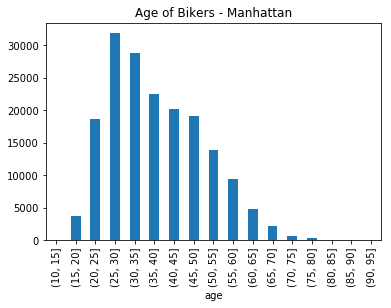

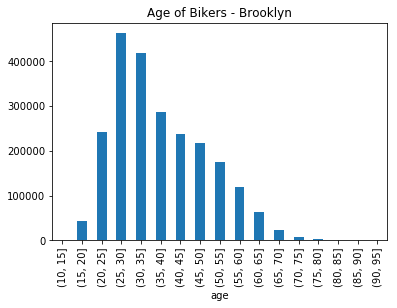

In [114]:

bins = np.arange(10, 99, 5)

axmanhattan = manhattan_df['age'].groupby(pd.cut(manhattan_df['age'], bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False, title="Age of Bikers - Manhattan")

axbrooklyn = brooklyn_df['age'].groupby(pd.cut(brooklyn_df['age'], bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False, title="Age of Bikers - Brooklyn")

### Null Hypothesis: H0: The age of bikers from Manhattan and Brooklyn are different i.e not correlated
### Alternate Hypothesis: H1: The age of bikers from Manhattan and Brooklyn are same i.e. correlated
### $$ \alpha = 0.05 $$

In [108]:
manhattan_df.dropna(inplace=True)
brooklyn_df.dropna(inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [109]:
ks = scipy.stats.ks_2samp(manhattan_df['age'], brooklyn_df['age'])
print(ks)

Ks_2sampResult(statistic=0.03790554975082803, pvalue=1.4039743387307092e-205)


In [110]:
print(len(manhattan_df))
print(len(brooklyn_df))

176926
2299646


#### Since Pearson's test and Spearman test require same number of samples, and the number of samples in
#### brooklyn_df is more I have selected random values from it and number of these values is equal 
#### to the shorter dataframe

In [111]:

ps = scipy.stats.pearsonr(sorted(np.random.choice(brooklyn_df['age'], len(manhattan_df))),
                          sorted(manhattan_df['Trip Duration']))
print(ps)

(0.25269301139964961, 0.0)


In [112]:
sp = scipy.stats.spearmanr(sorted(np.random.choice(brooklyn_df['age'], len(manhattan_df))),
                          sorted(manhattan_df['Trip Duration']))
print(sp)

SpearmanrResult(correlation=0.99958437825514612, pvalue=0.0)


#### As seen above, the results for all the tests show that pvalue = 0, which is less than 0.05 
#### which is the significance level chosen

#### Also it can be seen from results of spearman's test that correlation is 0.99 which is a high 
#### value of correlation

#### Therefore, the null hypothesis can be rejected.